# 1. 캐글

캐글(Kaggle)은 데이터 과학자와 머신러닝 엔지니어들이 학습, 협업, 경쟁할 수 있는 온라인 플랫폼입니다. 구글에 소속된 이 플랫폼은 다양한 데이터셋과 머신러닝 문제를 제공하며, 사용자들이 자신의 모델을 개발하고 성능을 경쟁적으로 평가받을 수 있는 경진대회도 열립니다. 초보자는 데이터를 다루는 실습을 하고, 경험 많은 전문가들은 포트폴리오를 확장하거나 상금을 받을 기회를 얻을 수 있습니다. 또한, 커뮤니티 포럼과 튜토리얼, 노트북 공유를 통해 지식을 공유하고 학습할 수 있는 환경을 제공합니다. 캐글은 데이터 분석과 머신러닝을 배우고 실제 문제에 적용해 보고 싶은 사람들에게 유용한 플랫폼입니다.

# 2. Online Retail

아래 사이트에 접속해 데이터를 다운로드합니다.

https://www.kaggle.com/datasets/


{ "username": "idkimhyeonyong", "key": "bddf87389edb20fe6377a5fb9e8fee44" }

In [9]:
# from google.colab import files
# files.upload()  # kaggle.json 업로드 창 표시
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [10]:
# !kaggle datasets download mashlyn/online-retail-ii-uci

In [11]:
# !unzip -qq /content/online-retail-ii-uci.zip

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
retail = pd.read_csv("/content/drive/MyDrive/KDT/9_데이터분석/data/online_retail_II.csv")
retail.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


```
InvoiceNo: 주문 번호
StockCode: 상품 코드
Description: 상품 설명
Quantity: 주문 수량
InvoiceDate: 주문 날짜
Price: 상품 가격
Customer ID: 고객 아이디
Country: 고객 거주지역(국가)
```

In [16]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [18]:
retail.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [21]:
retail.isnull().mean()

,0
Invoice,0.000000
StockCode,0.000000
Description,0.004105
Quantity,0.000000
InvoiceDate,0.000000
Price,0.000000
Customer ID,0.227669
Country,0.000000


In [23]:
# 비회원/탈퇴회원
retail = retail[pd.notnull(retail["Customer ID"])]
len(retail)

824364

In [26]:
# 구입 수량이 0 이하인 데이터를 제거
retail[retail.Quantity <= 0].head(3)
retail = retail[retail.Quantity >= 1]
len(retail)

805620

In [28]:
# 구입 가격이 0 이하인 데이터를 제거
print(len(retail[retail.Price <= 0]))
retail = retail[retail.Price > 0]
print(len(retail))

71
805549


In [30]:
# 고객의 총 지출비용
retail["Total"] = retail.Quantity * retail.Price
retail.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0


In [31]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 805549 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      805549 non-null  object 
 1   StockCode    805549 non-null  object 
 2   Description  805549 non-null  object 
 3   Quantity     805549 non-null  int64  
 4   InvoiceDate  805549 non-null  object 
 5   Price        805549 non-null  float64
 6   Customer ID  805549 non-null  float64
 7   Country      805549 non-null  object 
 8   Total        805549 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 61.5+ MB


In [32]:
retail["InvoiceDate"] = pd.to_datetime(retail["InvoiceDate"])
retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 805549 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      805549 non-null  object        
 1   StockCode    805549 non-null  object        
 2   Description  805549 non-null  object        
 3   Quantity     805549 non-null  int64         
 4   InvoiceDate  805549 non-null  datetime64[ns]
 5   Price        805549 non-null  float64       
 6   Customer ID  805549 non-null  float64       
 7   Country      805549 non-null  object        
 8   Total        805549 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 61.5+ MB


In [33]:
revenue = retail.Total.sum()
print(revenue)

17743429.178000003


In [38]:
# 각 나라별 구매 횟수
retail.Country.value_counts().head(4)

,count
Country,
United Kingdom,725250
Germany,16694
EIRE,15743
France,13812


In [39]:
retail.groupby("Country")["Quantity"].count().sort_values(ascending=False).head(4)

,Quantity
Country,
United Kingdom,725250
Germany,16694
EIRE,15743
France,13812


In [52]:
# 국가별 매출
revenue_by_coutries = retail.groupby("Country")["Total"].sum().sort_values(ascending=False).round(1)
revenue_by_coutries.index
revenue_by_coutries.values

array([1.47231475e+07, 6.21631100e+05, 5.54232300e+05, 4.31262500e+05,
       3.55257500e+05, 1.69968100e+05, 1.09178500e+05, 1.00365300e+05,
       9.15497000e+04, 6.98622000e+04, 6.57534000e+04, 6.01096000e+04,
       5.72853000e+04, 4.71384000e+04, 4.49968000e+04, 3.25504000e+04,
       2.99255000e+04, 2.53171000e+04, 2.49801000e+04, 2.36130000e+04,
       1.90962000e+04, 1.09024000e+04, 1.04211000e+04, 9.20270000e+03,
       8.61360000e+03, 8.36690000e+03, 8.09910000e+03, 6.55370000e+03,
       5.63330000e+03, 4.88300000e+03, 3.07050000e+03, 1.93370000e+03,
       1.69390000e+03, 1.41190000e+03, 1.35440000e+03, 1.30020000e+03,
       1.11850000e+03, 8.26700000e+02, 5.36400000e+02, 1.45900000e+02,
       1.40400000e+02])

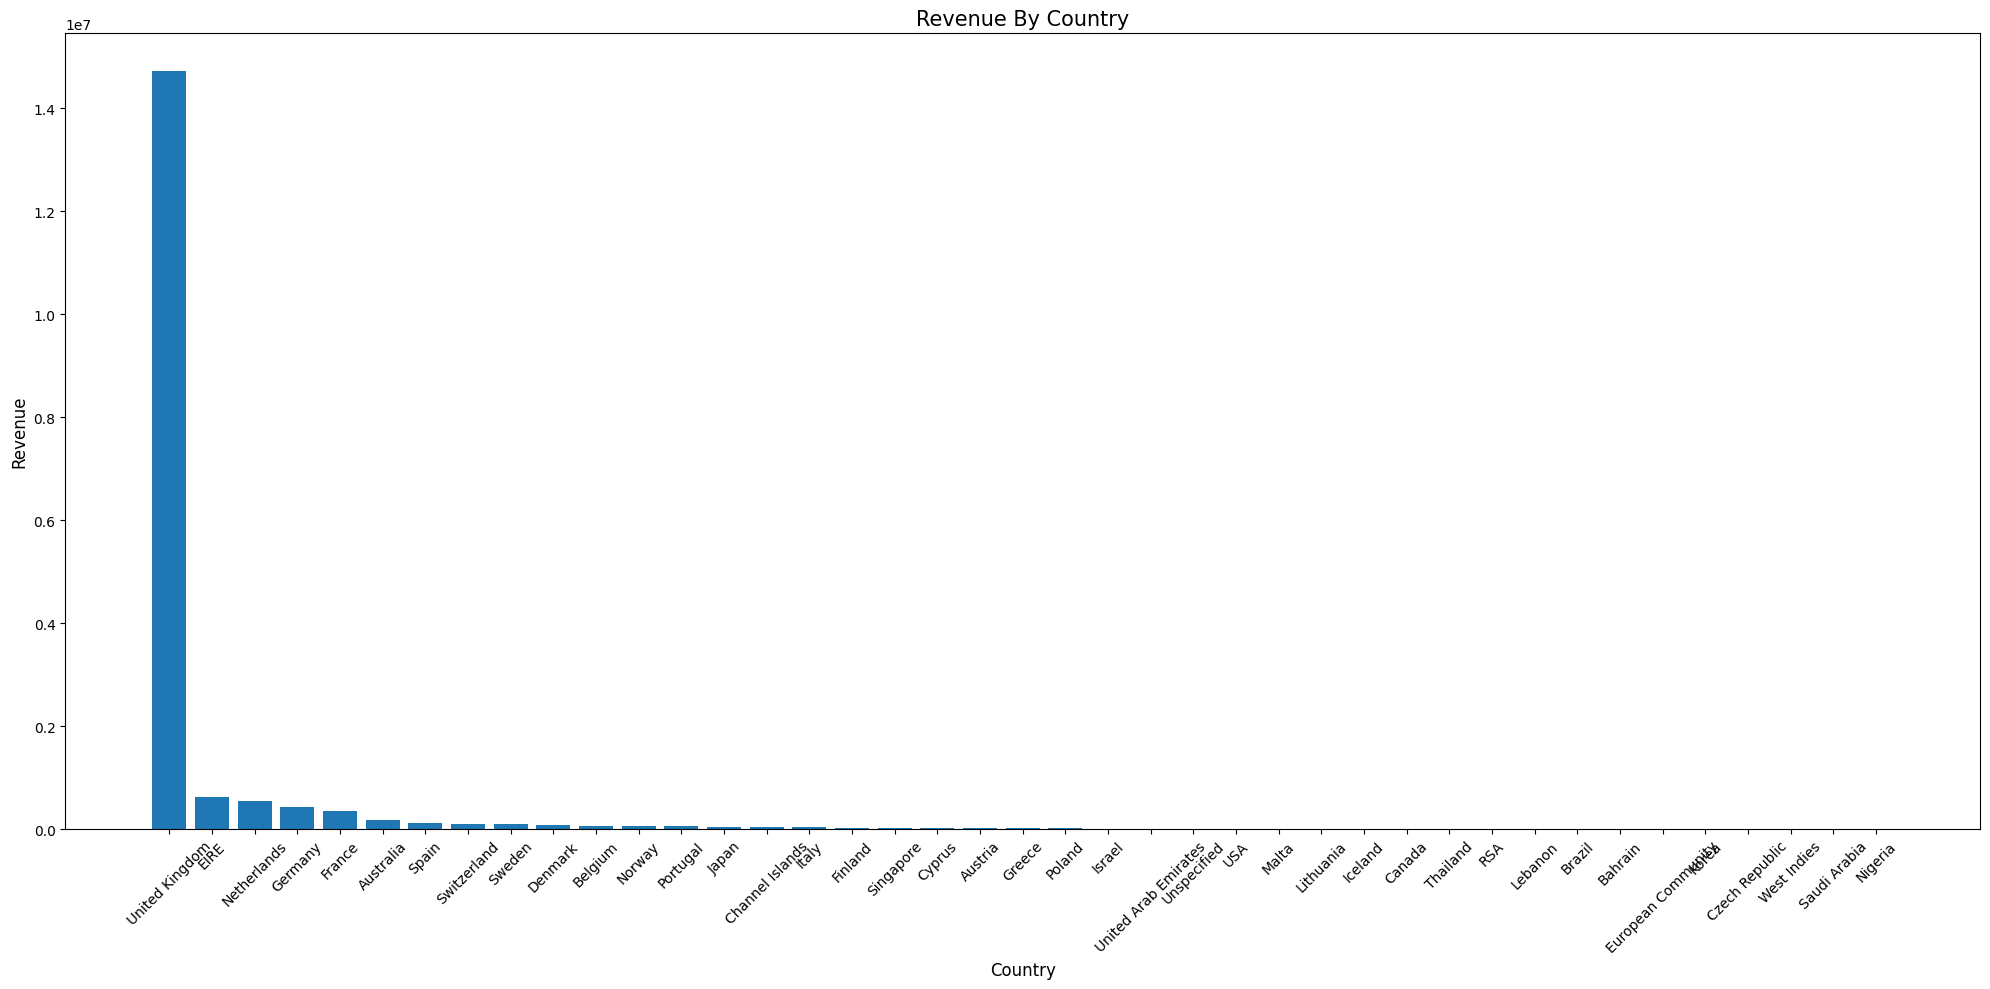

In [55]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(revenue_by_coutries.index, revenue_by_coutries.values.round(1))
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Revenue', fontsize=12)
ax.set_title('Revenue By Country', fontsize=15)
ax.set_xticks(range(len(revenue_by_coutries.index)))
ax.set_xticklabels(revenue_by_coutries.index, rotation=45)
plt.tight_layout()
plt.show()

In [57]:
def extract_month(date):
  month = str(date.month)
  if date.month < 10:
    month = "0" + month
  return str(date.year) + month

In [65]:
revenue_by_month = retail.set_index("InvoiceDate").groupby(extract_month)["Total"].sum().round(1)
revenue_by_month.head()

,Total
InvoiceDate,
200912,686654.2
201001,557319.1
201002,506371.1
201003,699609.0
201004,594609.2


In [64]:
def plot_bar(df, xlabel, ylabel, title, figsize=(20, 10), fontsize=12, titlesize=15, rotation=45):
    fig, ax = plt.subplots(figsize=figsize)
    ax.bar(df.index, df.values)
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)
    ax.set_title(title, fontsize=titlesize)
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.index, rotation=rotation, fontsize=fontsize)
    plt.tight_layout()
    plt.show()

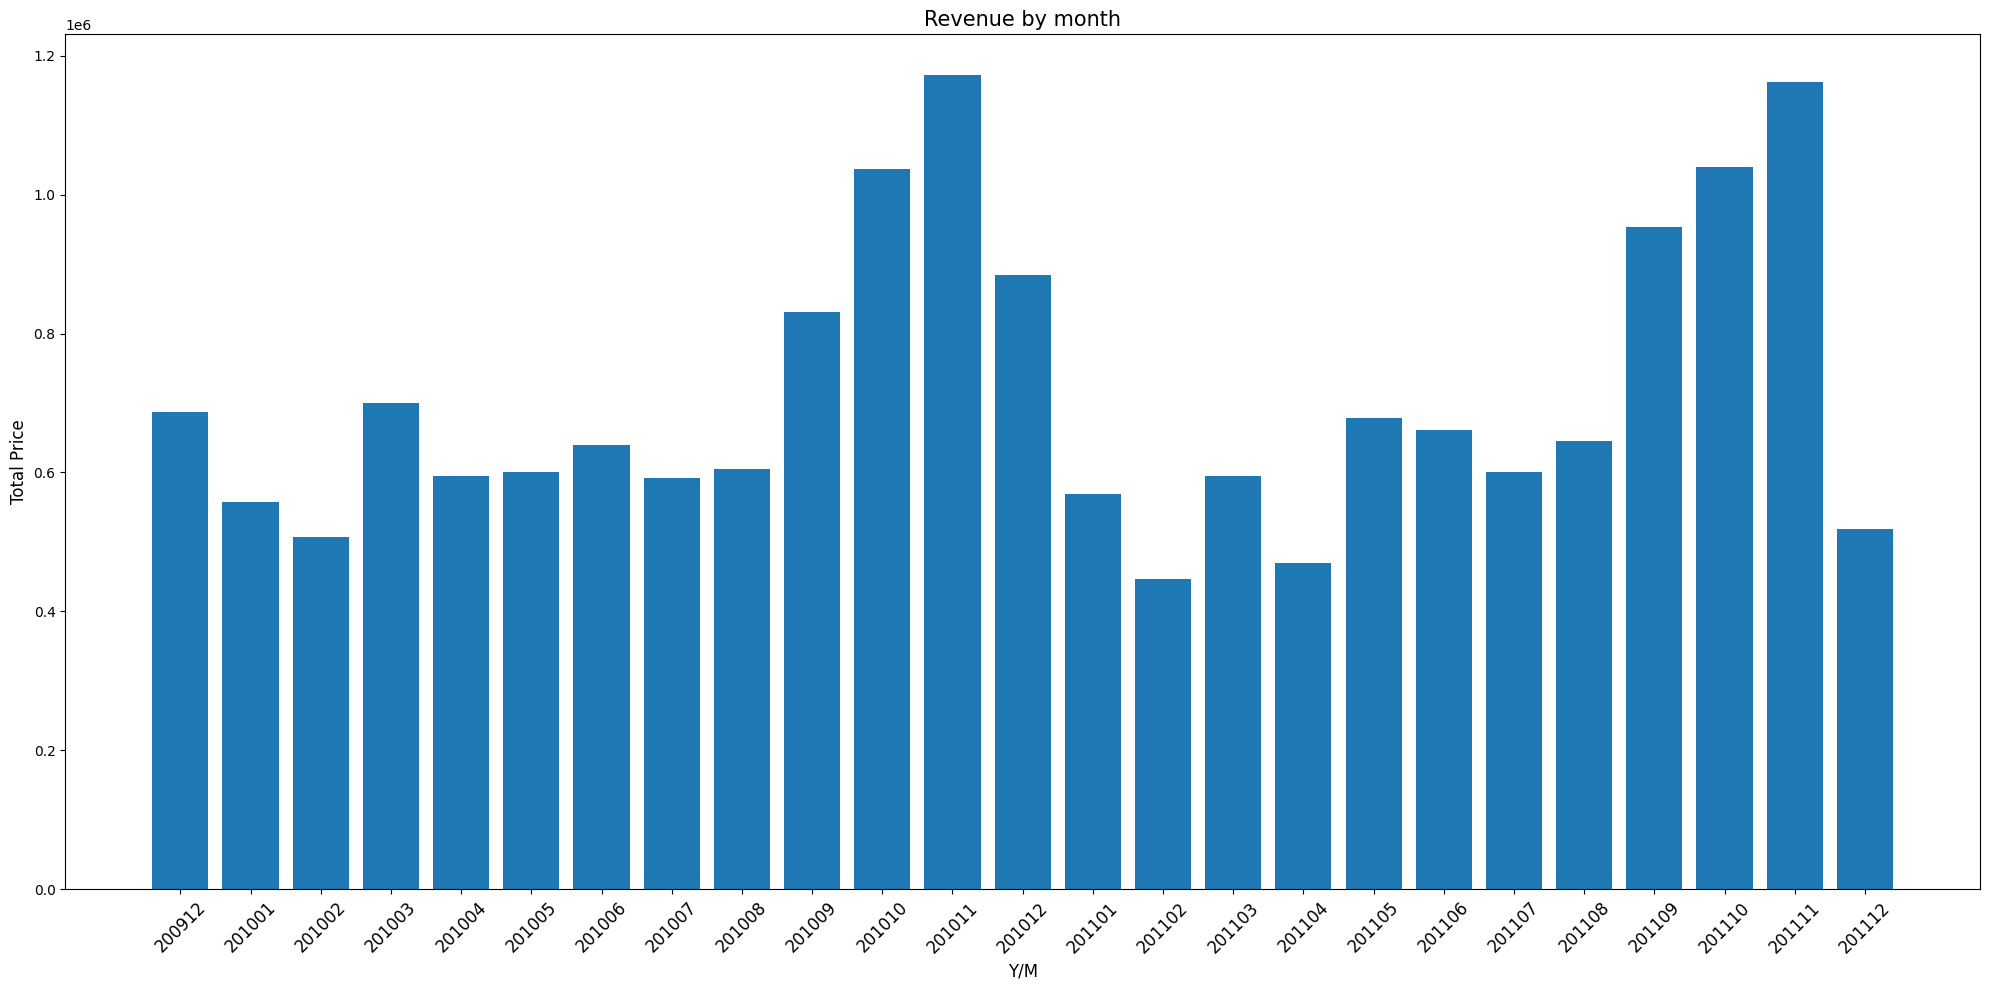

In [67]:
plot_bar(revenue_by_month, "Y/M", "Total Price", "Revenue by month")

In [75]:
# 요일별 날짜를 추가
def extract_dow(date):
  return date.dayofweek

In [76]:
revenue_by_dow = retail.set_index("InvoiceDate").groupby(lambda date:date.dayofweek)["Total"].sum().round(1)
revenue_by_dow.head()

,Total
InvoiceDate,
0,2817407.8
1,3384678.8
2,3115619.7
3,3841083.0
4,2758423.5


In [77]:
DAY_OF_WEEK = np.array(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
revenue_by_dow.index = DAY_OF_WEEK[revenue_by_dow.index]
revenue_by_dow.head()

,Total
Mon,2817407.8
Tue,3384678.8
Wed,3115619.7
Thu,3841083.0
Fri,2758423.5


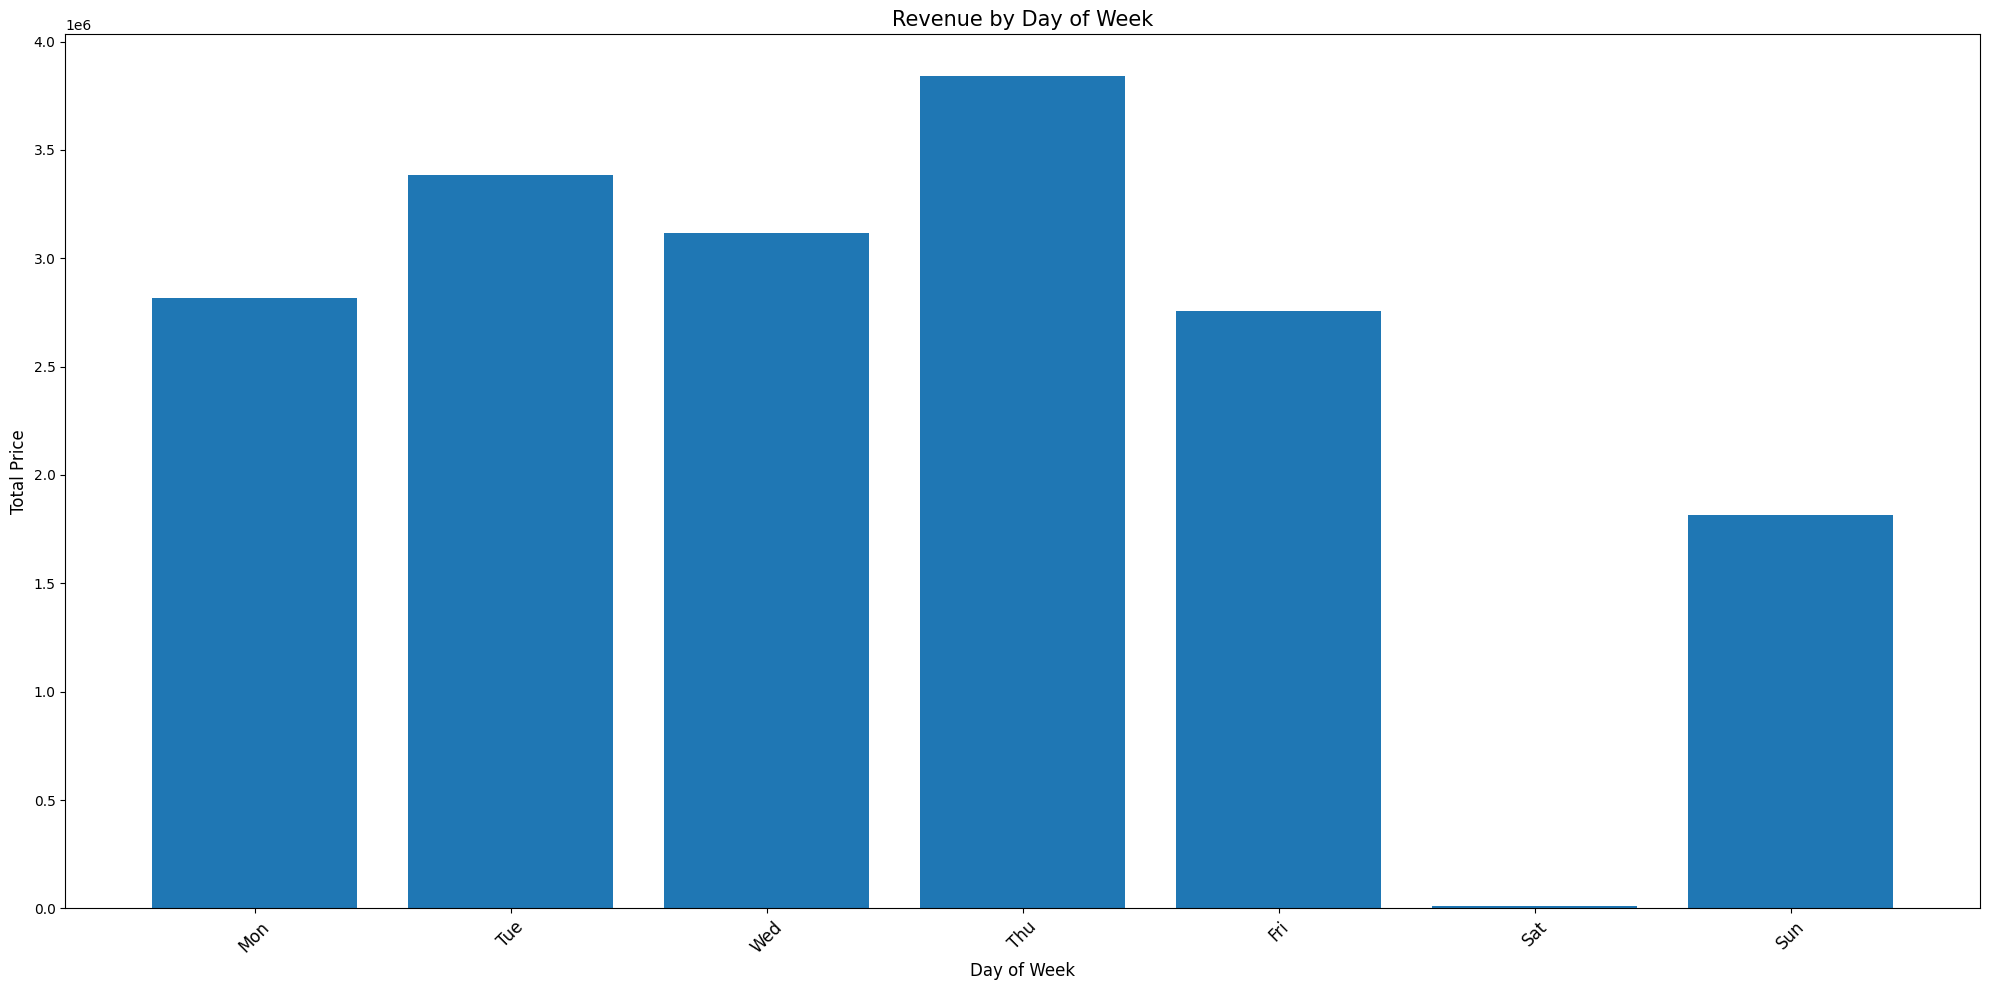

In [73]:
plot_bar(revenue_by_dow, "Day of Week", "Total Price", "Revenue by Day of Week")

In [78]:
# 시간대별 매출
revenue_by_hour = retail.set_index("InvoiceDate").groupby(lambda date:date.hour)["Total"].sum().round(1)
revenue_by_hour.head()

,Total
InvoiceDate,
6,4.2
7,76212.6
8,528877.7
9,1509659.9
10,2360784.8


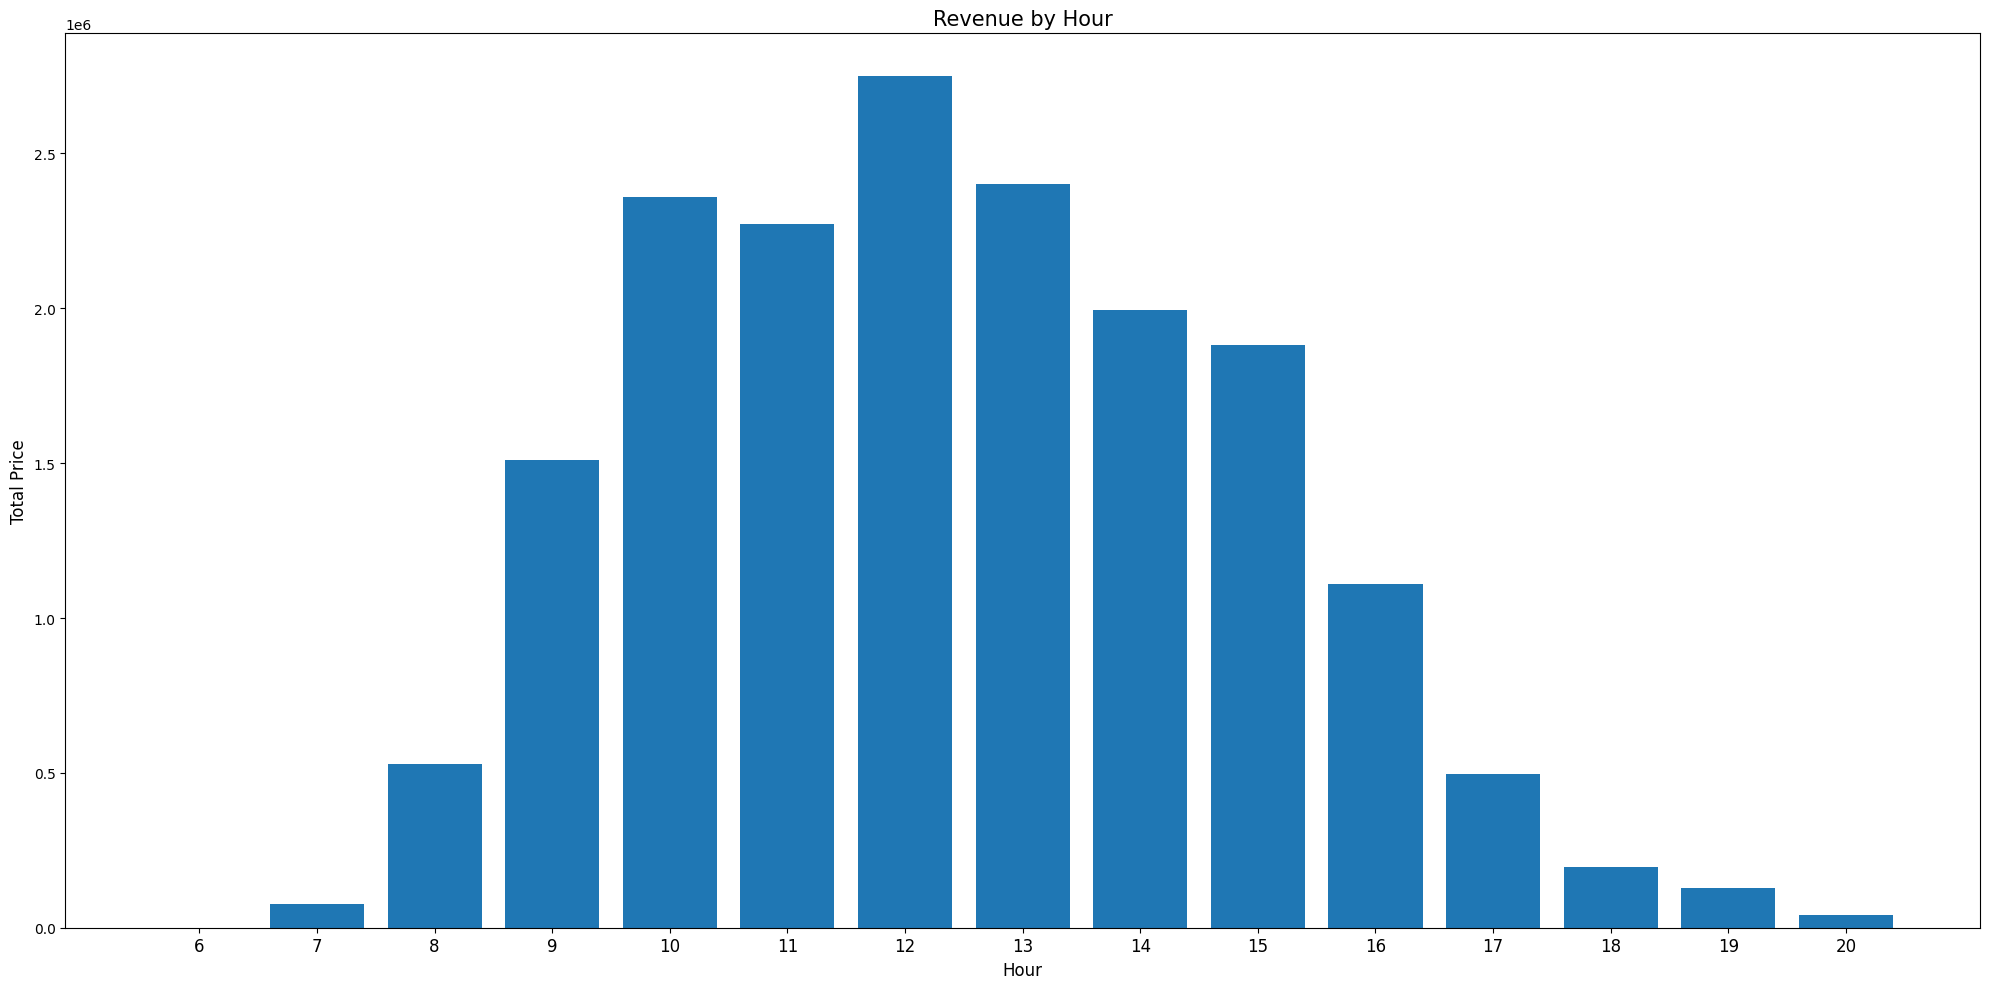

In [80]:
plot_bar(revenue_by_hour, "Hour", "Total Price", "Revenue by Hour", rotation=0)